In [81]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [2]:
quotations = pd.read_csv("../quotations231001.csv").drop(columns='sys_cooler')
print('len:', len(quotations))
quotations.head()

len: 1080


,cpu,mainboard,ram,gpu,case,power,cooler,ssd
0,18640280.0,18652877.0,16443341.0,27613427.0,21583046.0,19813847.0,21550985.0,12338942.0
1,18039569.0,18652877.0,18700841.0,18021914.0,18419840.0,19023932.0,NaN,13538642.0
2,19627808.0,18021440.0,18911780.0,18668606.0,12969350.0,21206702.0,18714860.0,17454683.0
3,19174175.0,21628184.0,18911780.0,21629063.0,NaN,19814027.0,NaN,17001050.0
4,17913710.0,18021491.0,18911780.0,18303401.0,16571885.0,18442058.0,18076145.0,16587443.0


In [3]:
cpus = quotations.cpu

In [4]:
cpu_df = pd.read_csv("../part_cpu_wb230922.csv")
mainboard_df = pd.read_csv("../part_mainboard230926.csv")
ram_df = pd.read_csv("../part_ram230921.csv")
gpu_df = pd.read_csv("../part_gpu_wb230921.csv")
case_df = pd.read_csv("../part_case230920.csv")
power_df = pd.read_csv("../part_power230920.csv")
cooler_df = pd.read_csv("../part_cooler230920.csv")
ssd_df = pd.read_csv("../part_ssd230926.csv")

In [5]:
mcb = max(cpu_df['bench_mark'])
mgb = max(gpu_df['bench_mark'])
mrc = max(ram_df['capacity'])
mncb = min(cpu_df['bench_mark'])
mngb = min(gpu_df['bench_mark'])
mnrc = min(ram_df['capacity'])

In [82]:
price_tbl = pickle.load(open("../quotation_price.pkl", "rb"))

In [104]:
cooler_df.loc[cooler_df['product_seq'] == row[6], 'price']

Series([], Name: price, dtype: float64)

In [147]:

        for o in others:
            if not o.empty:
                total += o.iloc[0]

In [195]:
others

[0,
 1    77550.0
 Name: price, dtype: float64,
 145    94480.0
 Name: price, dtype: float64,
 Series([], Name: price, dtype: float64),
 Series([], Name: price, dtype: float64)]

In [207]:
prices_r = dict({'cpu': [], 'gpu': [], 'ram': [], 'mainboard': [], 'power': [], 'case': [], 'cooler': [], 'ssd': [], 'total': []})
prices = dict({'cpu': [], 'gpu': [], 'ram': [], 'total': []})
pseqs = dict({'cpu': [], 'gpu': [], 'ram': []})
# bench_r = dict({'cpu': [], 'gpu': [], 'ram': []})
bench_r = dict({'cpu': [], 'gpu': [], 'ram': [], 'total': []})
bench_rr = dict({'cpu': [], 'gpu': [], 'ram': [], 'total': []})
pr_sum = [0] * 5

for row in quotations.values:
    try:
        cpu_price = cpu_df.loc[cpu_df['product_seq'] == row[0], 'price'].iloc[0]
        ram_price = ram_df.loc[ram_df['product_seq'] == row[2], 'price'].iloc[0]
        gpu_price = gpu_df.loc[gpu_df['product_seq'] == row[3], 'price'].iloc[0]
        
        cpu_bench = cpu_df.loc[cpu_df['product_seq'] == row[0], 'bench_mark'].iloc[0]
        ram_capa = ram_df.loc[ram_df['product_seq'] == row[2], 'capacity'].iloc[0]
        gpu_bench = gpu_df.loc[gpu_df['product_seq'] == row[3], 'bench_mark'].iloc[0]
        
        others = [None] * 5
        others[0] = mainboard_df.loc[mainboard_df['product_seq'] == row[1], 'price']
        others[1] = case_df.loc[case_df['product_seq'] == row[4], 'price']
        others[2] = power_df.loc[power_df['product_seq'] == row[5], 'price']
        others[3] = cooler_df.loc[cooler_df['product_seq'] == row[6], 'price']
        others[4] = ssd_df.loc[ssd_df['product_seq'] == row[7], 'price']
        
        total = cpu_price+gpu_price+ram_price
        for i, o in enumerate(others):
            if not o.empty:
                total += o.iloc[0]
                others[i] = o.iloc[0]
                pr_sum[i] += o.iloc[0]
            else:
                others[i] = 0
        if np.isnan(total) or np.isnan(gpu_price) or np.isnan(ram_price): continue
        prices_r['cpu'].append(cpu_price / total)
        prices_r['gpu'].append(gpu_price / total)
        prices_r['ram'].append(ram_price / total)
        prices_r['mainboard'].append(others[0] / total)
        prices_r['case'].append(others[1] / total)
        prices_r['cooler'].append(others[3] / total)
        prices_r['ssd'].append(others[4] / total)
        prices_r['power'].append(others[2] / total)
        prices_r['total'].append(np.log(total / 10000000))
        
        bench_r['cpu'].append(np.log((cpu_bench - mncb) / (mcb - mncb) + 1))
        bench_r['gpu'].append(np.log((gpu_bench - mngb) / (mgb - mngb) + 1))
        bench_r['ram'].append(np.log((ram_capa - mnrc) / (mrc - mnrc) + 1))
        bench_r['total'].append(np.log(total / 10000000 + 2))
        
        clog = np.log((cpu_bench - mncb) / (mcb - mncb) + 1)
        glog = np.log((gpu_bench - mngb) / (mgb - mngb) + 1)
        rlog = np.log((ram_capa - mnrc) / (mrc - mnrc) + 1)
        tlog = np.log(total / 10000000 + 2)
        total_log = clog + glog + rlog
        bench_rr['cpu'].append(clog / total_log)
        bench_rr['gpu'].append(glog / total_log)
        bench_rr['ram'].append(rlog / total_log)
        bench_rr['total'].append(tlog / total_log)
        
        prices['cpu'].append(cpu_price)
        prices['gpu'].append(gpu_price)
        prices['ram'].append(ram_price)
        prices['total'].append(total)
        
        pseqs['cpu'].append(cpu_df.loc[cpu_df['product_seq'] == row[0], 'product_seq'].iloc[0])
        pseqs['gpu'].append(gpu_df.loc[gpu_df['product_seq'] == row[2], 'product_seq'].iloc[0])
        pseqs['ram'].append(ram_df.loc[ram_df['product_seq'] == row[3], 'product_seq'].iloc[0])
        
    except Exception as e:
        continue

In [208]:
for key in prices_r.keys():
    print(len(prices_r[key]))
print(len(prices['total']))

680
680
680
680
680
680
680
680
680
680


In [9]:
minc = min(prices['cpu'])
maxc = max(prices['cpu'])
ming = min(prices['gpu'])
maxg = max(prices['gpu'])
minr = min(prices['ram'])
maxr = max(prices['ram'])
mint = min(prices['total'])
maxt = max(prices['total'])

In [10]:
cpn = [(x - minc) / (maxc - minc) for x in prices['cpu']]
gpn = [(x - ming) / (maxg - ming) for x in prices['gpu']]
rpn = [(x - minr) / (maxr - minr) for x in prices['ram']]
tpn = [(x - mint) / (maxt - mint) for x in prices['total']]

In [11]:
for t in prices['cpu']:
    if np.isnan(t):
        print(t)

In [12]:
pdata = np.array([cpn, gpn, rpn, tpn]).T

In [210]:
price_rate = np.array(pd.DataFrame(prices_r))

In [154]:
k = 10
model = KMeans(n_clusters=k, n_init='auto')

### CPU, GPU, RAM, 총 가격 수준이 비슷한 견적들끼리 묶는다.
- 군집화(Clustering)에 K-Means 알고리즘을 사용함

In [155]:
model.fit(pdata)

C:\Users\SSAFY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=10, n_init='auto')

In [156]:
res = model.predict(pdata)

# 1. 총 견적 가격(y축)에서 CPU가 차지하는 비율(x축)
- 전체적으로 총 견적 가격이 높을수록 CPU의 가격이 차지하는 비율은 낮아짐
- 그룹1 (파랑): 일반적인 용도 (사무 등)
- 그룹2 (노랑): 중간 사양
- 그룹3 (초록): 고사양
- 그룹4 (빨강): 고사양(게임)

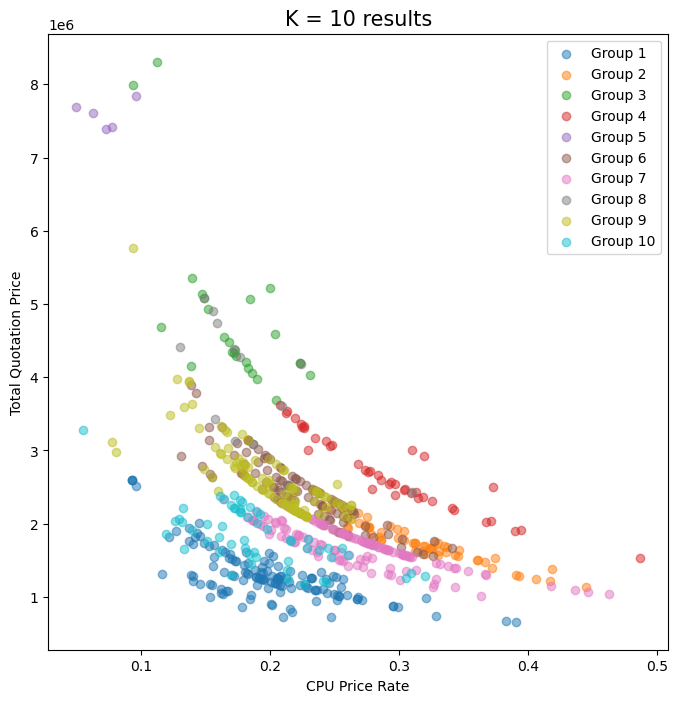

In [157]:
plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(price_rate[res == i, 0], pdata[res == i, 3] * (maxt - mint) + mint, alpha=0.5, label=f'Group {i+1}')

plt.title('K = %d results'%k , size = 15)
plt.legend()
plt.xlabel('CPU Price Rate')
plt.ylabel('Total Quotation Price')
plt.show()

In [158]:
for i in range(k):
    total_avg = np.average(np.array(prices['total'])[res == i])
    print(f'Group{i+1} Average Total Price: {total_avg:.0f}')

Group1 Average Total Price: 1287320
Group2 Average Total Price: 1767639
Group3 Average Total Price: 4774987
Group4 Average Total Price: 2698162
Group5 Average Total Price: 7591699
Group6 Average Total Price: 2422882
Group7 Average Total Price: 1693139
Group8 Average Total Price: 3859418
Group9 Average Total Price: 2606982
Group10 Average Total Price: 1839517


In [159]:
for i in range(k):
    cpu_bench = 0
    for cseq in np.array(pseqs['cpu'])[res == i]:
        cpu_bench += cpu_df.loc[cpu_df['product_seq'] == cseq, 'bench_mark'].iloc[0]
    group_len = len(np.array(pseqs['cpu'])[res == i])
    print(f'Group{i+1} Average Bench: {cpu_bench/group_len:.0f}')

Group1 Average Bench: 25786
Group2 Average Bench: 45088
Group3 Average Bench: 58175
Group4 Average Bench: 57859
Group5 Average Bench: 43963
Group6 Average Bench: 42479
Group7 Average Bench: 38475
Group8 Average Bench: 52374
Group9 Average Bench: 40786
Group10 Average Bench: 32828


In [160]:
lst = []
for i in range(k):
    cpu_price = 0
    for cseq in np.array(pseqs['cpu'])[res == i]:
        cpu_price += cpu_df.loc[cpu_df['product_seq'] == cseq, 'price'].iloc[0]
    group_len = len(np.array(pseqs['cpu'])[res == i])
    lst.append(cpu_price/group_len)
    print(f'Group{i+1} Average Price: {cpu_price/group_len:.0f}')

Group1 Average Price: 245521
Group2 Average Price: 539819
Group3 Average Price: 791344
Group4 Average Price: 760522
Group5 Average Price: 546360
Group6 Average Price: 529017
Group7 Average Price: 439736
Group8 Average Price: 692020
Group9 Average Price: 504715
Group10 Average Price: 337274


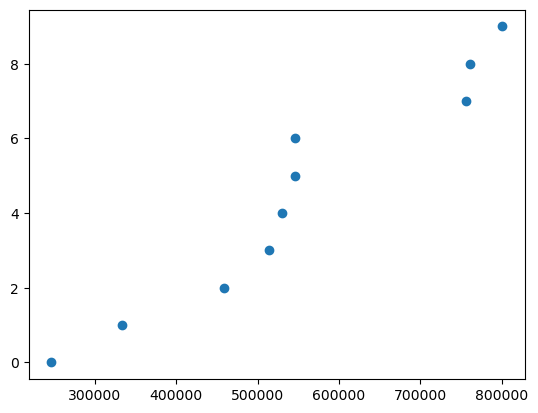

In [21]:
plt.scatter(np.sort(lst), range(len(lst)))
plt.show()

In [161]:
for i in range(k):
    cpu_rate = np.average(price_rate[res == i, 0]) * 100
    gpu_rate = np.average(price_rate[res == i, 1]) * 100
    ram_rate = np.average(price_rate[res == i, 2]) * 100
    mainboard_rate = np.average(price_rate[res == i, 2]) * 100
    ram_rate = np.average(price_rate[res == i, 2]) * 100
    ram_rate = np.average(price_rate[res == i, 2]) * 100
    ram_rate = np.average(price_rate[res == i, 2]) * 100
    ram_rate = np.average(price_rate[res == i, 2]) * 100
    print(f'Group{i+1} Average Rate: {cpu_rate:2.0f}%: {gpu_rate:2.0f}%: {ram_rate:1.0f}%: {np.sum([cpu_rate, gpu_rate, ram_rate]):2.0f}%')

Group1 Average Rate: 20%: 49%: 4%: 73%
Group2 Average Rate: 31%: 37%: 4%: 72%
Group3 Average Rate: 17%: 55%: 2%: 75%
Group4 Average Rate: 29%: 43%: 3%: 75%
Group5 Average Rate:  7%: 83%: 2%: 92%
Group6 Average Rate: 23%: 46%: 7%: 75%
Group7 Average Rate: 27%: 45%: 3%: 74%
Group8 Average Rate: 19%: 46%: 8%: 73%
Group9 Average Rate: 20%: 54%: 2%: 76%
Group10 Average Rate: 19%: 48%: 8%: 74%


# 2. 총 견적 가격(y축)에서 GPU가 차지하는 비율(x축)
- 전체적으로 총 견적 가격이 높을수록 GPU의 가격이 차지하는 비율은 높아짐
- 그룹1 (파랑)

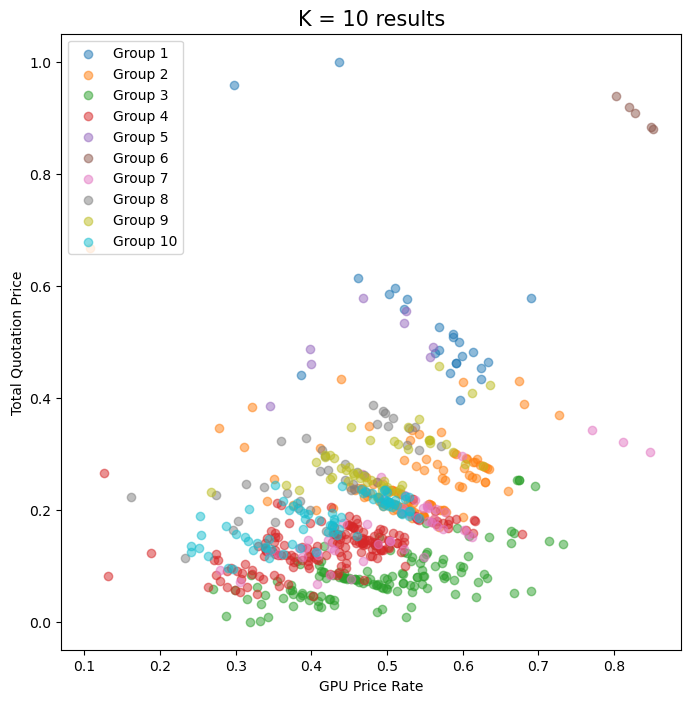

In [23]:
plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(price_rate[res == i, 1], pdata[res == i, 3], alpha=0.5, label=f'Group {i+1}')

plt.title('K = %d results'%k , size = 15)
plt.legend()
plt.xlabel('GPU Price Rate')
plt.ylabel('Total Quotation Price')
plt.show()

# 3. 총 견적 가격(y축)에서 RAM이 차지하는 비율(x축)
- 전체적으로 총 견적 가격이 높을수록 RAM의 가격이 차지하는 비율은 낮아짐
- 그룹1 (파랑)

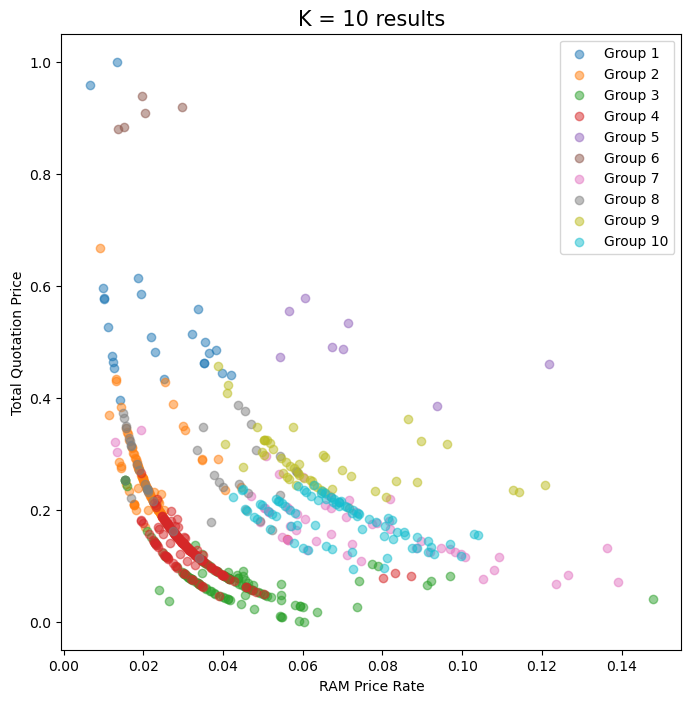

In [24]:
plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(price_rate[res == i, 2], pdata[res == i, 3], alpha=0.5, label=f'Group {i+1}')

plt.title('K = %d results'%k , size = 15)
plt.legend()
plt.xlabel('RAM Price Rate')
plt.ylabel('Total Quotation Price')
plt.show()

# 프로그램 사양 분석

In [25]:
gp = pd.read_csv('../gameprograms230921.csv')
ep = pd.read_csv('../etc_programs_utf.csv')
gr = pd.read_csv(f'../gamerequirements230926.csv')
er = pd.read_csv(f'../etc_requirements231002.csv')

In [26]:
programs = pd.concat([gp, ep], ignore_index=True)
reqs = pd.concat([gr, er], ignore_index=True)

In [27]:
headers = programs.usage.unique()
avg_cpu_bench = [0] * len(headers)
avg_gpu_bench = [0] * len(headers)
avg_ram_capa = [0] * len(headers)
total_counts = []

for usage in headers:
    programs_usage = reqs[reqs['program_id'].isin(programs.loc[programs.usage == usage].index)]
    
    cpu_bench = 0
    gpu_bench = 0
    ram_capa = 0
    total = len(programs_usage)
    
    for cid in programs_usage.cpu_id:
        cpu_bench += cpu_df.loc[cid-1, 'bench_mark']
    
    for gid in programs_usage.gpu_id:
        if np.isnan(gid): continue
        gpu_bench += gpu_df.loc[gid-1, 'bench_mark']
        
    for rc in programs_usage.ram:
        if np.isnan(rc): continue
        ram_capa += rc
        
    avg_cpu_bench[np.where(headers == usage)[0][0]] = cpu_bench / total
    avg_gpu_bench[np.where(headers == usage)[0][0]] = gpu_bench / total
    avg_ram_capa[np.where(headers == usage)[0][0]] = ram_capa / total
    total_counts.append(total)

print('  CPU |   GPU |  RAM |')
print('----------------------')
for h, acb, agb, arc, tt in zip(headers, avg_cpu_bench, avg_gpu_bench, avg_ram_capa, total_counts):
    print(f'{acb:5.0f} | {agb:5.0f} | {arc:4.1f} | {h} ({tt}개)')

  CPU |   GPU |  RAM |
----------------------
 3109 |  2968 |  5.4 | 게임 (12094개)
 5852 |  1332 |  3.8 | 사무 (6개)
 4874 |     0 |  5.8 | 개발 (16개)
 6118 |  1341 | 16.0 | 영상 편집 (12개)
25142 | 10948 | 13.6 | 방송 (5개)
 7903 |  5386 |  8.4 | 이미지 편집 (15개)
 6690 |  3139 | 12.6 | 모델링 (26개)
 6461 |  1448 |  7.4 | 인코딩 (8개)
 4316 |   200 |  7.5 | 음악 작업 (16개)


## 꾸

In [28]:
rdata = np.array(pd.DataFrame(prices_r))

In [29]:
rdata

array([[ 0.16052919,  0.34407198,  0.09197665, -1.82775252],
       [ 0.18593491,  0.58363361,  0.03960248, -0.90231091],
       [ 0.2551446 ,  0.50038338,  0.02299391, -1.48888095],
       ...,
       [ 0.20783355,  0.47872455,  0.06175801, -1.34664297],
       [ 0.1996157 ,  0.51902332,  0.02162424, -1.42746642],
       [ 0.37154483,  0.30345874,  0.04926278, -1.59458378]])

In [30]:
k = 16
model_r = KMeans(n_clusters=k, n_init='auto')

In [31]:
model_r.fit(rdata)

C:\Users\SSAFY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=16, n_init='auto')

In [32]:
res_r = model_r.predict(rdata)

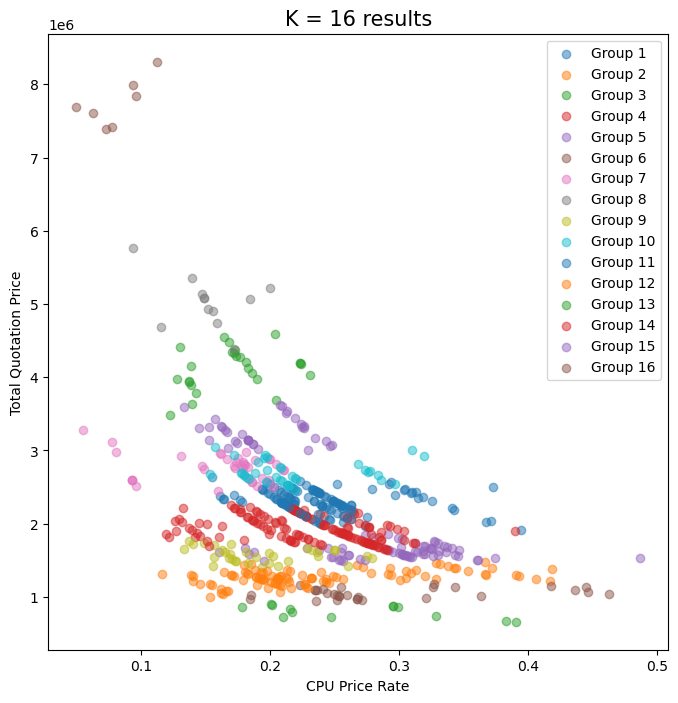

In [33]:
plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(price_rate[res_r == i, 0], pdata[res_r == i, 3] * (maxt - mint) + mint, alpha=0.5, label=f'Group {i+1}')

plt.title('K = %d results'%k , size = 15)
plt.legend()
plt.xlabel('CPU Price Rate')
plt.ylabel('Total Quotation Price')
plt.show()

In [34]:
for i in range(k):
    total_avg = np.average(np.array(prices['total'])[res_r == i])
    print(f'Group{i+1} Average Total Price: {total_avg:.0f}')

Group1 Average Total Price: 2376886
Group2 Average Total Price: 1341253
Group3 Average Total Price: 4119316
Group4 Average Total Price: 2074167
Group5 Average Total Price: 1624478
Group6 Average Total Price: 1052512
Group7 Average Total Price: 2766664
Group8 Average Total Price: 5029554
Group9 Average Total Price: 1574404
Group10 Average Total Price: 2707205
Group11 Average Total Price: 2180862
Group12 Average Total Price: 1221172
Group13 Average Total Price: 800235
Group14 Average Total Price: 1819071
Group15 Average Total Price: 3255794
Group16 Average Total Price: 7751320


In [35]:
for i in range(k):
    cpu_bench = 0
    for cseq in np.array(pseqs['cpu'])[res_r == i]:
        cpu_bench += cpu_df.loc[cpu_df['product_seq'] == cseq, 'bench_mark'].iloc[0]
    group_len = len(np.array(pseqs['cpu'])[res_r == i])
    print(f'Group{i+1} Average Bench: {cpu_bench/group_len:.0f}')

Group1 Average Bench: 42149
Group2 Average Bench: 37115
Group3 Average Bench: 53695
Group4 Average Bench: 37355
Group5 Average Bench: 41195
Group6 Average Bench: 29157
Group7 Average Bench: 37916
Group8 Average Bench: 57069
Group9 Average Bench: 29651
Group10 Average Bench: 46090
Group11 Average Bench: 47382
Group12 Average Bench: 25648
Group13 Average Bench: 22959
Group14 Average Bench: 40512
Group15 Average Bench: 48794
Group16 Average Bench: 48787


In [36]:
lst = []
for i in range(k):
    cpu_price = 0
    for cseq in np.array(pseqs['cpu'])[res_r == i]:
        cpu_price += cpu_df.loc[cpu_df['product_seq'] == cseq, 'price'].iloc[0]
    group_len = len(np.array(pseqs['cpu'])[res_r == i])
    lst.append(cpu_price/group_len)
    print(f'Group{i+1} Average Price: {cpu_price/group_len:.0f}')

Group1 Average Price: 542011
Group2 Average Price: 409168
Group3 Average Price: 709637
Group4 Average Price: 417711
Group5 Average Price: 481154
Group6 Average Price: 309080
Group7 Average Price: 448270
Group8 Average Price: 757225
Group9 Average Price: 304289
Group10 Average Price: 589119
Group11 Average Price: 594416
Group12 Average Price: 238923
Group13 Average Price: 209929
Group14 Average Price: 466630
Group15 Average Price: 627221
Group16 Average Price: 630380


In [37]:
for i in range(k):
    cpu_rate = np.average(price_rate[res_r == i, 0]) * 100
    gpu_rate = np.average(price_rate[res_r == i, 1]) * 100
    ram_rate = np.average(price_rate[res_r == i, 2]) * 100
    print(f'Group{i+1:2d} Average Rate: {cpu_rate:2.0f}%: {gpu_rate:2.0f}%: {ram_rate:1.0f}%: {np.sum([cpu_rate, gpu_rate, ram_rate]):2.0f}%')

Group 1 Average Rate: 23%: 50%: 4%: 77%
Group 2 Average Rate: 31%: 35%: 5%: 71%
Group 3 Average Rate: 17%: 58%: 3%: 79%
Group 4 Average Rate: 20%: 56%: 4%: 80%
Group 5 Average Rate: 30%: 36%: 5%: 71%
Group 6 Average Rate: 29%: 36%: 5%: 70%
Group 7 Average Rate: 16%: 62%: 2%: 81%
Group 8 Average Rate: 15%: 48%: 3%: 67%
Group 9 Average Rate: 19%: 54%: 4%: 77%
Group10 Average Rate: 22%: 42%: 5%: 69%
Group11 Average Rate: 27%: 37%: 5%: 69%
Group12 Average Rate: 20%: 51%: 4%: 75%
Group13 Average Rate: 27%: 41%: 6%: 73%
Group14 Average Rate: 26%: 46%: 4%: 75%
Group15 Average Rate: 19%: 49%: 4%: 72%
Group16 Average Rate:  8%: 70%: 2%: 80%


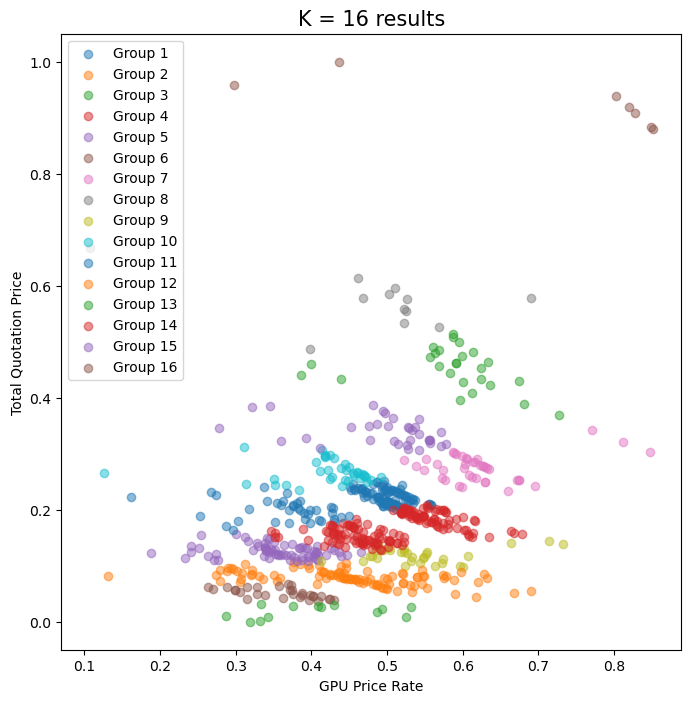

In [267]:
plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(price_rate[res_r == i, 1], pdata[res_r == i, 3], alpha=0.5, label=f'Group {i+1}')

plt.title('K = %d results'%k , size = 15)
plt.legend()
plt.xlabel('GPU Price Rate')
plt.ylabel('Total Quotation Price')
plt.show()

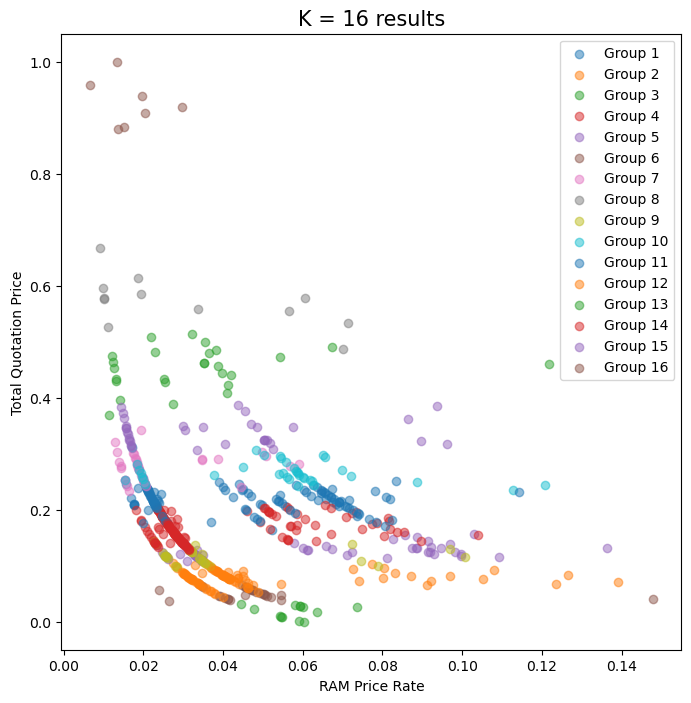

In [39]:
plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(price_rate[res_r == i, 2], pdata[res_r == i, 3], alpha=0.5, label=f'Group {i+1}')

plt.title('K = %d results'%k , size = 15)
plt.legend()
plt.xlabel('RAM Price Rate')
plt.ylabel('Total Quotation Price')
plt.show()

# 뚜

In [64]:
quotation_price = pd.read_csv("../price231006.csv")

In [78]:
qpr = dict(quotation_price.iloc[0])

In [79]:
len(qpr)

960

In [40]:
bdata = np.array(pd.DataFrame(bench_rr))

In [41]:
bdata

array([[0.27222218, 0.54496674, 0.18281108, 0.9192716 ],
       [0.35896017, 0.5249914 , 0.11604843, 0.66485724],
       [0.30823763, 0.61068437, 0.08107799, 0.82171727],
       ...,
       [0.34155597, 0.52353194, 0.13491208, 0.71798713],
       [0.33609368, 0.5860932 , 0.07781313, 0.79493748],
       [0.45078159, 0.40348498, 0.14573343, 0.75123023]])

In [249]:
k = 16
model_b = KMeans(n_clusters=k, n_init='auto')

In [250]:
model_b.fit(bdata)

C:\Users\SSAFY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=16, n_init='auto')

In [251]:
res_b = model_b.predict(bdata)

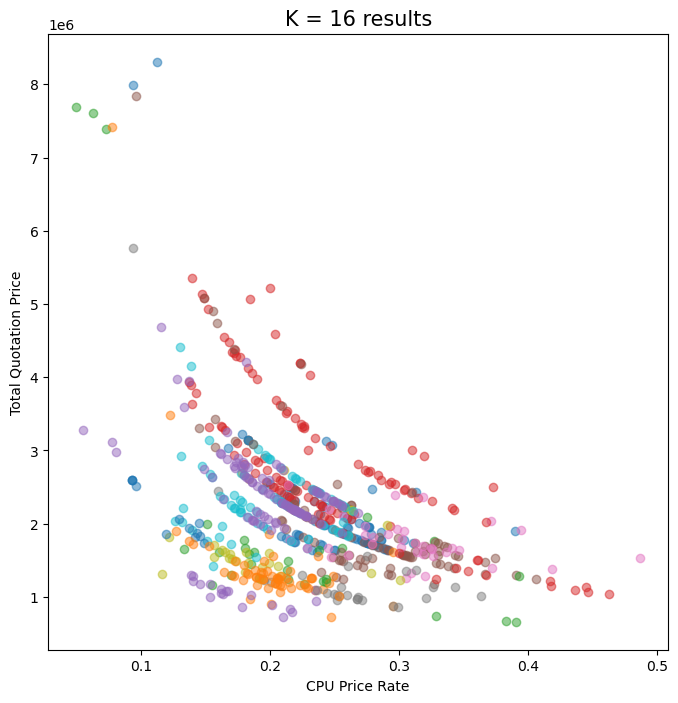

In [268]:
plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(price_rate[res_b == i, 0], pdata[res_b == i, 3] * (maxt - mint) + mint, alpha=0.5, label=f'Group {i+1}')

plt.title('K = %d results'%k , size = 15)
plt.xlabel('CPU Price Rate')
plt.ylabel('Total Quotation Price')
plt.show()

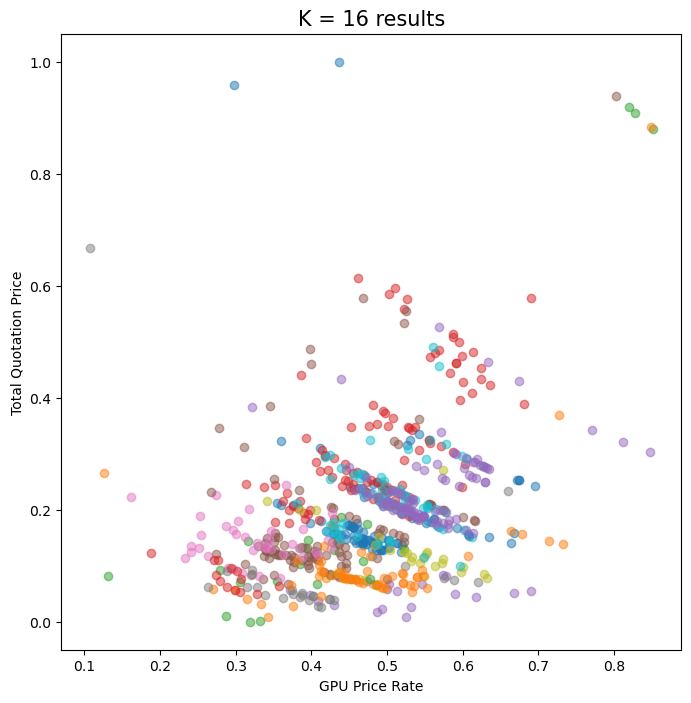

In [269]:
plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(price_rate[res_b == i, 1], pdata[res_b == i, 3], alpha=0.5, label=f'Group {i+1}')

plt.title('K = %d results'%k , size = 15)
plt.xlabel('GPU Price Rate')
plt.ylabel('Total Quotation Price')
plt.show()

In [253]:
for i in range(k):
    total_avg = np.average(np.array(prices['total'])[res_b == i])
    print(f'Group{i+1} Average Total Price: {total_avg:.0f}')

Group1 Average Total Price: 2135005
Group2 Average Total Price: 1195600
Group3 Average Total Price: 2320828
Group4 Average Total Price: 3040197
Group5 Average Total Price: 1320615
Group6 Average Total Price: 1803938
Group7 Average Total Price: 1763131
Group8 Average Total Price: 1325661
Group9 Average Total Price: 1622654
Group10 Average Total Price: 2360828
Group11 Average Total Price: 2271795
Group12 Average Total Price: 1467881
Group13 Average Total Price: 919492
Group14 Average Total Price: 1606233
Group15 Average Total Price: 2476042
Group16 Average Total Price: 3766719


In [254]:
for i in range(k):
    cpu_bench = 0
    for cseq in np.array(pseqs['cpu'])[res_b == i]:
        cpu_bench += cpu_df.loc[cpu_df['product_seq'] == cseq, 'bench_mark'].iloc[0]
    group_len = len(np.array(pseqs['cpu'])[res_b == i])
    print(f'Group{i+1} Average Bench: {cpu_bench/group_len:.0f}')

Group1 Average Bench: 43086
Group2 Average Bench: 25426
Group3 Average Bench: 30423
Group4 Average Bench: 53155
Group5 Average Bench: 21407
Group6 Average Bench: 40510
Group7 Average Bench: 46719
Group8 Average Bench: 29000
Group9 Average Bench: 28755
Group10 Average Bench: 36129
Group11 Average Bench: 28061
Group12 Average Bench: 27167
Group13 Average Bench: 29982
Group14 Average Bench: 43750
Group15 Average Bench: 39500
Group16 Average Bench: 53305


In [255]:
lst = []
for i in range(k):
    cpu_price = 0
    for cseq in np.array(pseqs['cpu'])[res_b == i]:
        cpu_price += cpu_df.loc[cpu_df['product_seq'] == cseq, 'price'].iloc[0]
    group_len = len(np.array(pseqs['cpu'])[res_b == i])
    lst.append(cpu_price/group_len)
    print(f'Group{i+1} Average Price: {cpu_price/group_len:.0f}')

Group1 Average Price: 504297
Group2 Average Price: 257497
Group3 Average Price: 337655
Group4 Average Price: 653835
Group5 Average Price: 185659
Group6 Average Price: 478214
Group7 Average Price: 532111
Group8 Average Price: 309857
Group9 Average Price: 326051
Group10 Average Price: 460135
Group11 Average Price: 301029
Group12 Average Price: 272185
Group13 Average Price: 313354
Group14 Average Price: 519489
Group15 Average Price: 490178
Group16 Average Price: 696944


In [256]:
crate = []
grate = []
rrate = []
mrate = []
prate = []
carate = []
corate = []
srate = []
for i in range(k):
    cpu_rate = np.average(price_rate[res_b == i, 0]) * 100
    gpu_rate = np.average(price_rate[res_b == i, 1]) * 100
    ram_rate = np.average(price_rate[res_b == i, 2]) * 100
    mbpr = price_rate[res_b == i, 3]
    mbprnz = mbpr[mbpr != 0]
    mb_rate = np.average(mbprnz) * 100
    capr = price_rate[res_b == i, 4]
    caprnz = capr[capr != 0]
    ca_rate = np.average(cprnz) * 100
    copr = price_rate[res_b == i, 5]
    coprnz = copr[copr != 0]
    co_rate = np.average(copr) * 100
    sspr = price_rate[res_b == i, 6]
    ssprnz = sspr[sspr != 0]
    ss_rate = np.average(ssprnz) * 100
    popr = price_rate[res_b == i, 7]
    poprnz = popr[popr != 0]
    po_rate = np.average(poprnz) * 100
    total_rate = cpu_rate + gpu_rate + ram_rate + mb_rate + po_rate + ca_rate + co_rate + ss_rate
    crate.append(cpu_rate/total_rate * 100)
    grate.append(gpu_rate/total_rate * 100)
    rrate.append(ram_rate/total_rate * 100)
    mrate.append(mb_rate/total_rate * 100)
    prate.append(po_rate/total_rate * 100)
    carate.append(ca_rate/total_rate * 100)
    corate.append(co_rate/total_rate * 100)
    srate.append(ss_rate/total_rate * 100)
    
for i in range(k):
    total_avg = np.average(np.array(prices['total'])[res_b == i])
    print(f'Group{i+1:2d} Average Rate: {crate[i]:2.0f}%: {grate[i]:2.0f}%: {rrate[i]:1.0f}%: {mrate[i]:2.0f}%: {prate[i]:1.0f}%: {carate[i]:1.0f}%: {corate[i]:1.0f}%: {srate[i]:1.0f}%: {np.sum([cpu_rate, gpu_rate, ram_rate]):2.0f}%: {total_avg:>7.0f}')

Group 1 Average Rate: 23%: 44%: 2%: 12%: 5%: 4%: 2%: 6%: 72%: 2135005
Group 2 Average Rate: 21%: 28%: 6%: 23%: 8%: 4%: 4%: 7%: 72%: 1195600
Group 3 Average Rate: 18%: 44%: 8%: 11%: 5%: 4%: 3%: 6%: 72%: 2320828
Group 4 Average Rate: 22%: 48%: 4%: 11%: 4%: 4%: 2%: 4%: 72%: 3040197
Group 5 Average Rate: 16%: 54%: 4%: 11%: 6%: 4%: 3%: 3%: 72%: 1320615
Group 6 Average Rate: 27%: 40%: 3%: 13%: 5%: 4%: 3%: 5%: 72%: 1803938
Group 7 Average Rate: 29%: 30%: 7%: 15%: 7%: 4%: 2%: 6%: 72%: 1763131
Group 8 Average Rate: 25%: 39%: 4%: 17%: 6%: 4%: 2%: 3%: 72%: 1325661
Group 9 Average Rate: 19%: 50%: 3%: 11%: 5%: 4%: 3%: 5%: 72%: 1622654
Group10 Average Rate: 19%: 49%: 6%: 11%: 5%: 4%: 2%: 3%: 72%: 2360828
Group11 Average Rate: 13%: 60%: 3%:  9%: 5%: 4%: 2%: 4%: 72%: 2271795
Group12 Average Rate: 19%: 48%: 4%: 12%: 5%: 4%: 3%: 4%: 72%: 1467881
Group13 Average Rate: 32%: 29%: 5%: 15%: 6%: 4%: 1%: 8%: 72%:  919492
Group14 Average Rate: 35%: 31%: 3%: 15%: 5%: 4%: 2%: 4%: 72%: 1606233
Group15 Average Rate

In [257]:
crate[0]

23.472340254004394

In [227]:
cpu_rate

24.517633580497662

In [228]:
total_rate

104.83810149879749

In [258]:
grouped = np.array([crate, grate, rrate, mrate, prate, carate, corate, srate]).T

In [259]:
grouped[5, 0]

26.640617866336946

# 모델 저장

In [260]:
import pickle

In [261]:
pickle.dump(model_b, open("rate_by_bench.pkl", "wb"))

In [262]:
pickle.dump(grouped, open("rate_group.pkl", "wb"))

In [263]:
load_model = pickle.load(open("rate_by_bench.pkl", "rb"))

In [264]:
load_group = pickle.load(open("rate_group.pkl", "rb"))

In [265]:
lres = load_model.predict(bdata)

In [266]:
crate = []
grate = []
rrate = []
for i in range(k):
    cpu_rate = np.average(price_rate[lres == i, 0]) * 100
    gpu_rate = np.average(price_rate[lres == i, 1]) * 100
    ram_rate = np.average(price_rate[lres == i, 2]) * 100
    crate.append(cpu_rate)
    grate.append(gpu_rate)
    rrate.append(ram_rate)
    total_avg = np.average(np.array(prices['total'])[lres == i])
    print(f'Group{i:2d} Average Rate: {cpu_rate:2.0f}%: {gpu_rate:2.0f}%: {ram_rate:1.0f}%: {np.sum([cpu_rate, gpu_rate, ram_rate]):2.0f}%: {total_avg:>7.0f}')

Group 0 Average Rate: 25%: 47%: 3%: 74%: 2135005
Group 1 Average Rate: 23%: 29%: 6%: 58%: 1195600
Group 2 Average Rate: 19%: 46%: 8%: 73%: 2320828
Group 3 Average Rate: 22%: 49%: 4%: 76%: 3040197
Group 4 Average Rate: 16%: 56%: 4%: 76%: 1320615
Group 5 Average Rate: 28%: 42%: 3%: 73%: 1803938
Group 6 Average Rate: 31%: 32%: 8%: 70%: 1763131
Group 7 Average Rate: 26%: 40%: 4%: 70%: 1325661
Group 8 Average Rate: 20%: 52%: 3%: 75%: 1622654
Group 9 Average Rate: 20%: 51%: 6%: 77%: 2360828
Group10 Average Rate: 13%: 62%: 3%: 78%: 2271795
Group11 Average Rate: 20%: 50%: 4%: 74%: 1467881
Group12 Average Rate: 35%: 31%: 5%: 71%:  919492
Group13 Average Rate: 36%: 32%: 4%: 72%: 1606233
Group14 Average Rate: 20%: 55%: 2%: 77%: 2476042
Group15 Average Rate: 19%: 44%: 9%: 72%: 3766719


In [ ]:
import time

In [ ]:
time.localtime().tm_year